## U4 :: Análisis de estructuras en red
# **Práctica 1 - Crear y manipular grafos**


---

<br>

Un departamento de IT de una empresa cuenta ocho empleados a los que se les pidió que eligieran las 3 películas que más les gustaría ver en las visitas que realizan en grupo al cine semanalmente. Las elecciones están disponibles en el fichero `elecciones_pelis_empleados.txt`.

Un segundo archivo, `afinidad_empleados.txt`, tiene datos sobre el grado de afinidad que existe en las relaciones entre diferentes compañeros de trabajo. La puntuación de la relación tiene un valor de -100 (enemigos) a +100 (mejores amigos). Un valor de cero significa que los dos empleados no han interactuado o son indiferentes.

Ambos archivos están delimitados por tabulaciones.

<br>
NOTA: Se aconseja revisa el cuaderno `Operaciones y Carga de Grafos en NetworkX.ipynb`


In [40]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

from google.colab import drive
drive.mount('/content/drive')
path ='/content/drive/MyDrive/Módulos :: 2022-23/Modelos de inteligencia artificial (IA-BD)/4. Análisis de estructuras en red/Prácticas/P1/'


# Lista de empleados
empleados = set(['Raimundo',
                 'Juanele',
                 'Jorgina',
                 'Vicent',
                 'Anastasio',
                 'Frida',
                 'Ronaldo',
                 'Paquito'])
                

# Lista de películas
peliculas = set(['Blade_Runner',
              '2001_Una_Odisea_en_el_espacio',
              'The_Matrix',
              'Doce_Monos',
              'Regreso_al_Futuro',
              'Gattaca',
              'Alien_El_Octavo_Pasajero',
              'Terminator',
              'Encuentros_en_la_Tercera_Fase',
              'Primer',
              'Ex_Machina'])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Puedes usar la siguiente función ***plot_graph*** para representar por pantalla un grafo que le sea pasado como argumento.

In [2]:
from networkx.classes.function import edges
def plot_graph(G, nombre_peso=None):
    '''
    G: es el grafo recibido como argumento
    nombre_pesos: nombre del atributo para representar el peso de los enlaces (si G incluye pesos)
    '''
    import matplotlib.pyplot as plt
    
    plt.figure(3,figsize=(9,9)) 
    pos = nx.spring_layout(G)
    enlaces = G.edges()
    pesos = None
        
    if nombre_peso:
        pesos = [int(G[u][v][nombre_peso]) for u,v in enlaces]
        etiquetas = nx.get_edge_attributes(G, nombre_peso)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=etiquetas)
        nx.draw_networkx(G, pos, edges=enlaces, width=pesos);
    else:
         nx.draw_networkx(G, pos)

### **Ejercicio 1**

Con NetworkX, añade el código en la siguiente función que cargue el grafo bipartito de `elecciones_pelis_empleados.txt` (mediante `plot_graph`puedes representar el grafo resultante).

*Asegúrate que la función devuelve un grafo con 19 nodos y 24 enlaces*

In [ ]:
def ejercicio_1():
  ej1 = nx.read_edgelist(path + 'elecciones_pelis_empleados.txt')
  return ej1

G = ejercicio_1()
print("Numero de nodos: ", nx.number_of_nodes(G))
print("Numero de enlaces: ", nx.number_of_edges(G))
plot_graph(ejercicio_1())

In [42]:
list(G.nodes(data=True))

[('Anastasio', {}),
 ('Doce_Monos', {}),
 ('Ex_Machina', {}),
 ('The_Matrix', {}),
 ('Paquito', {}),
 ('Alien_El_Octavo_Pasajero', {}),
 ('Terminator', {}),
 ('Frida', {}),
 ('Blade_Runner', {}),
 ('Regreso_al_Futuro', {}),
 ('Jorgina', {}),
 ('Ronaldo', {}),
 ('2001_Una_Odisea_en_el_espacio', {}),
 ('Encuentros_en_la_Tercera_Fase', {}),
 ('Juanele', {}),
 ('Raimundo', {}),
 ('Primer', {}),
 ('Vicent', {}),
 ('Gattaca', {})]

### **Ejercicio 2**

Usando el grafo de la pregunta anterior, agrega atributos a los nodos con el nombre `'tipo'` donde las películas tienen el valor `'película'` y los empleados tienen el valor `'empleado'`, y devuelve ese gráfico.

*Esta función debería devolver un grafo (G) con atributos de nodo `{'tipo': 'pelicula'}` o `{'tipo': 'empleado'}`*

In [ ]:
from networkx.algorithms import bipartite

# Versión 1

def ejercicio_2():
  G = ejercicio_1()
  G.add_nodes_from(empleados, bipartite=0, tipo='empleado')
  G.add_nodes_from(peliculas, bipartite=1, tipo='pelicula')
  return G

list(ejercicio_2().nodes(data=True))

In [ ]:
bipartite.sets(ejercicio_2())

In [ ]:
# Versión 2

def ejercicio_2():
    G = ejercicio_1()
    for empleado in empleados:
      G.nodes[empleado]["tipo"] = "empleado"
    for pelicula in peliculas:
      G.nodes[empleado]["tipo"] = "pelicula"
    return G

### **Ejercicio 3**

Prepara un grafo proyectado ponderado que use el grafo obtenido en el `ejercicio_2` que informe de cuántas películas tienen en común diferentes pares de empleados.

*Esta función debe devolver un grafo proyectado ponderado*.

In [56]:
def ejercicio_3():
  return bipartite.weighted_projected_graph(ejercicio_2(), empleados)


ejercicio_3().edges(data=True)

EdgeDataView([('Jorgina', 'Anastasio', {'weight': 1}), ('Jorgina', 'Paquito', {'weight': 3}), ('Frida', 'Raimundo', {'weight': 2}), ('Frida', 'Vicent', {'weight': 2}), ('Frida', 'Anastasio', {'weight': 1}), ('Juanele', 'Ronaldo', {'weight': 3}), ('Juanele', 'Anastasio', {'weight': 1}), ('Ronaldo', 'Anastasio', {'weight': 1}), ('Vicent', 'Raimundo', {'weight': 1}), ('Anastasio', 'Paquito', {'weight': 1}), ('Anastasio', 'Raimundo', {'weight': 1})])

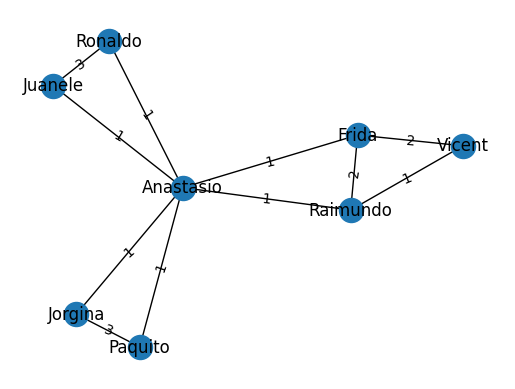

In [59]:
pos = nx.spring_layout(ejercicio_3())

labels = nx.get_edge_attributes(ejercicio_3(), 'weight')
nx.draw_networkx_edge_labels(ejercicio_3(), pos, edge_labels=labels)

nx.draw(ejercicio_3(), pos, with_labels=True)
plt.show()


### **Ejercicio 4**

Supongamos ahora que deseamos averiguar si a las personas que son más afines (es decir, tienen una puntuación alta en su relación) también les gustan los mismos tipos de películas.

Encuentra la correlación de Pearson (usando `DataFrame.corr()`) entre las puntuaciones de afinidad empleados y el número de películas que tienen en común. Si dos empleados no tienen películas en común, deberá tratarse como un 0 (es decir, no hay que dejarlo como un valor vacío) y debe incluirse en el cálculo de correlación.

*La función debe devolver un tipo flotante*

<br>

**Pregunta**: ¿Los empleados más afines comparten gustos?

<br>

Recurso: https://www.geeksforgeeks.org/how-to-calculate-correlation-between-two-columns-in-pandas/

In [ ]:
def ejercicio_4():

  # Leemos los valores de afinidad entre empleados
  df_afinidades = pd.read_table(path + 'afinidad_empleados.txt', delimiter=',', header=None)
  df_afinidades.rename(columns={0:'Persona_1', 1:'Persona_2', 2:'Grado_afinidad'}, inplace=True)

  df_pelis_en_comun = pd.DataFrame.from_dict(ejercicio_3().edges(data=True))
  df_pelis_en_comun[2] = df_pelis_en_comun[2].apply(lambda x: x['weight'])

  for index_1, fila_a in df_afinidades.iterrows():
    empleado_1a = fila_a['Persona_1']
    empleado_2a = fila_a['Persona_2']
    for index_2, fila_p in df_pelis_en_comun.iterrows():
      empleado_1b = fila_p[0]
      empleado_2b = fila_p[1]
      if ((empleado_1a == empleado_1b) and (empleado_2a == empleado_2b)) or ((empleado_1a == empleado_2b) and (empleado_2a == empleado_1b)):
        df_afinidades.loc[index_1, 'Pelis_en_comun'] = fila_p[2]

  # Rellenamos las celdas vacías con 0s
  df_afinidades.fillna(0, inplace=True)
  
  # Devolvemos el valor de Pearson
  return df_afinidades['Grado_afinidad'].corr(df_afinidades['Pelis_en_comun'])


# Calculamos la correlación de Pearson
print("El valor de la correlación es: {0:4.2f}".format(ejercicio_4()))

El valor de la correlación es: 0.79
